In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Using TensorFlow backend.


In [ ]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = ShapesConfig()
config.display()

In [86]:
import numpy as np
#x,y are position index and s is the length of side
hight=100
width=100
x=random.randint(1,95)
y=random.randint(1,95)
s=random.randint(5,np.minimum(100-x,100-y))
image = np.ones([hight,width])
image=cv2.rectangle(image, (x, y), (x+s, y+s), -1)

In [87]:
s

10

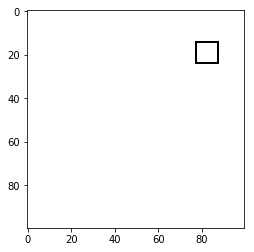

In [88]:
plt.imshow(image,cmap='gray')

In [32]:
image=cv2.circle(image, (x, y), s, -1)

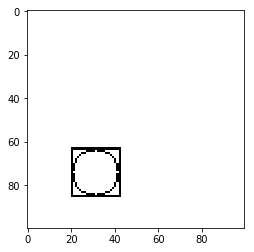

In [33]:
plt.imshow(image,cmap='gray')

In [37]:
points = np.array([[(x, y-s),
                    (x-s/math.sin(math.radians(60)), y+s),
                    (x+s/math.sin(math.radians(60)), y+s),
                    ]], dtype=np.int32)
#cv2.fillPoly(image, points, color)

In [57]:
points

array([[[226,  45],
        [213,  67],
        [238,  67]]], dtype=int32)

In [50]:
(x-s/math.sin(math.radians(60)), y+s)

(213.29829407782825, 67)

In [60]:
a=random.randint(0,100)
b=random.randint(0,100)
c=random.randint(0,100)

In [65]:
image1=cv2.line(image,(a,b),(b,c),-1)
image1=cv2.line(image,(b,c),(c,a),-1)
image1=cv2.line(image,(c,a),(a,b),-1)

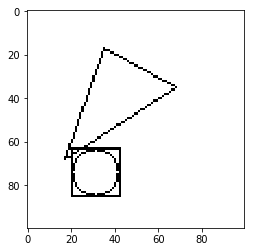

In [66]:
plt.imshow(image1,cmap='gray')

In [100]:
import numpy as np
#x,y are position index and s is the length of side
hight=100
width=100
x=random.randint(1,95)
y=random.randint(5,95)
s=random.randint(5,min(100-x,100-y,2*y))
image = np.ones([hight,width])
#image=cv2.rectangle(image, (x, y), (x+s, y+s), -1)
image1=cv2.line(image,(x,y),(x+s,y),-1)
image1=cv2.line(image,(int(x+s/2),int(y-s/2)),(int(x+s/2),int(y+s/2)),-1)

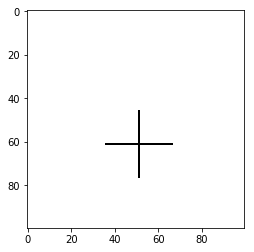

In [101]:
plt.imshow(image1,cmap='gray')

In [111]:
import numpy as np
#x,y are position index and s is the length of side
hight=100
width=100
x=random.randint(1,95)
y=random.randint(5,95)
s=random.randint(1,5)
image = np.ones([hight,width])
image=cv2.circle(image, (x, y), s,(0,0,255), -1)

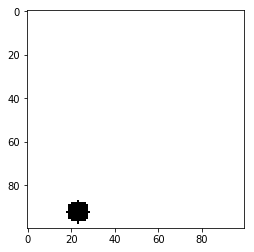

In [112]:
plt.imshow(image,cmap='gray')

In [176]:
a=random.randint(1,5)*0.1
b=random.randint(5,50)
c=random.randint(0,100-2*b)
x=np.arange(100)
y=np.sin(a*x)

pts=[]
for i in range (0,100):
    pts.append([x[i],int(b*y[i]+b+c)])

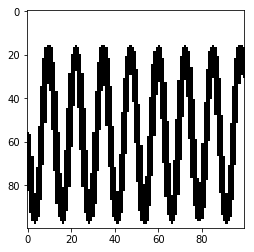

In [177]:
image = np.ones([hight,width])
line_width=random.randint(1,3)
image=cv2.polylines(image, [np.array(pts)], False, (0,0,255),thickness=line_width, lineType=cv2.LINE_8)
plt.imshow(image,cmap='gray')

In [171]:
cv2.polylines(imgage, [pts], False, color, thickness=line_width, lineType=cv2.CV_AA)

NameError: name 'imgage' is not defined